# Домашее задание №4

С 2015 года ежегодно проводится анонимный опрос европейских ИТ-специалистов, включающий информацию об их доходах. 

Источник: https://www.kaggle.com/parulpandey/2020-it-salary-survey-for-eu-region

В файле IT_Salary_Survey_EU_2020.csv содержаться следующие переменные:

    - Age	
    - Gender	
    - City	
    - Position 	
    - Total years of experience	
    - Years of experience in Germany	
    - Seniority level	
    - Your main technology / programming language	
    - Other technologies/programming languages you use often	
    - Yearly brutto salary (without bonus and stocks) in EUR	
    - Yearly bonus + stocks in EUR	
    - Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country	
    - Annual bonus+stocks one year ago. Only answer if staying in same country	
    - Number of vacation days	
    - Employment status	
    - Сontract duration	
    - Main language at work	
    - Company size	
    - Company type	
    - Have you lost your job due to the coronavirus outbreak?	
    - Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week	
    - Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR!



Задания:

    •	Постройте модель множественной линейной регрессии выбрав в качестве зависимой одну из переменных, характеризующих доход IT-специалиста. Выберите не менее 7-ми переменных в качестве независимых. Среди независимых переменных должно быть не менее 2 категориальных.
    
    •	Сформулируйте гипотезы исследования.
    
    •	Напишите уравнение регрессии. 
    
    •	Оцените характеристики регрессионной модели в целом. 
    
    •	Оцените значимость регрессионных коэффициентов. Сравните их между собой по силе взаимосвязи с зависимой переменной. 
    
    •	Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной. Это очень важный пункт задания, поскольку именно в нем мы делаем выводы о том, какие факторы и как могут влиять за зарплату IT-специалиста!
    
    •	Проведите диагностику модели. Есть ли в модели выбросы и/или влияющие наблюдения? Чем это может объясняться?
    
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [34]:
df = pd.read_csv('IT_Salary_Survey_EU_2020.csv', index_col=0)

In [35]:
# Названия переменных, скруггированные по типам данных
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: float64
['Age' 'Yearly brutto salary (without bonus and stocks) in EUR'
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week']

Type: object
['Gender' 'City' 'Position ' 'Total years of experience'
 'Years of experience in Germany' 'Seniority level'
 'Your main technology / programming language'
 'Other technologies/programming languages you use often'
 'Yearly bonus + stocks in EUR'
 'Annual bonus+stocks one year ago. Only answer if staying in same country'
 'Number of vacation days' 'Employment status' 'Сontract duration'
 'Main language at work' 'Company size' 'Company type'
 'Have you lost your job due to the coronavirus outbreak?'
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']



In [36]:
#Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing >= 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing

,Процент пропущенных значений
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",70.231445
"Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",63.128492
Annual bonus+stocks one year ago. Only answer if staying in same country,50.997606
Yearly bonus + stocks in EUR,33.838787
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,29.369513
Other technologies/programming languages you use often,12.529928
Your main technology / programming language,10.135674
Number of vacation days,5.426975
Years of experience in Germany,2.553871
Сontract duration,2.314445


#### Зависимая переменная: Yearly brutto salary (without bonus and stocks) in EUR	

In [37]:
df = df.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR': 'brutto_salary'})


In [38]:
df['brutto_salary'].describe()


count    1.253000e+03
mean     8.027904e+07
std      2.825061e+09
min      1.000100e+04
25%      5.880000e+04
50%      7.000000e+04
75%      8.000000e+04
max      1.000000e+11
Name: brutto_salary, dtype: float64

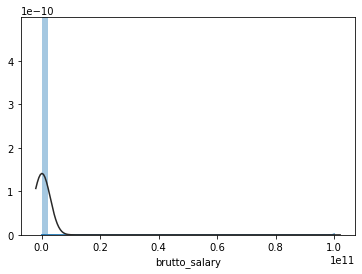

In [39]:
sns.distplot(df.brutto_salary, fit=stats.norm) 

In [40]:
print('Skewness: {:.4f}'.format(df['brutto_salary'].skew()))
print('Kurtosis: {:.4f}'.format(df['brutto_salary'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['brutto_salary'].quantile(0.75) - df['brutto_salary'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['brutto_salary'].quantile(0.9)/df['brutto_salary'].quantile(0.1)))

Skewness: 35.3964
Kurtosis: 1252.9372
Quartile Deviation: 10600.0000
Decile Ratio: 1.9792


In [41]:
stats.kstest(df.brutto_salary, 'norm', args=(df.brutto_salary.mean(), df.brutto_salary.std()))

KstestResult(statistic=0.5096189613156694, pvalue=2.8184304920054947e-302)

Зависимая переменная "brutto_salary" имеет распределение ???. Также оно ???. Среднее значение - 80 279 040, стандартное отклонение довольно высокое - ????. Медиана  - ????, межквартильная широта - ????, что также характеризует довольно большой разброс серединных 50% значений относительно медианы. Децильное отношение - ????.

В примере вообще не понятно откуда берутся цифры

In [42]:
df['Seniority level'].value_counts()



Senior                                       565
Middle                                       366
Lead                                         166
Junior                                        79
Head                                          44
Principal                                      3
Key                                            1
Self employed                                  1
Work Center Manager                            1
VP                                             1
C-Level                                        1
Manager                                        1
Working Student                                1
intern                                         1
Student                                        1
Entry level                                    1
no idea, there are no ranges in the firm       1
Director                                       1
Intern                                         1
No level                                       1
C-level executive ma

In [43]:
df['Company size'].value_counts() 

1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: Company size, dtype: int64

In [44]:
df['Position '].value_counts() 

Software Engineer                           387
Backend Developer                           174
Data Scientist                              110
Frontend Developer                           89
QA Engineer                                  71
                                           ... 
Software Sales                                1
Security Manager                              1
Test manager                                  1
Data Science Manager                          1
Business Development Manager Operations       1
Name: Position , Length: 148, dtype: int64

In [45]:
df['Employment status'].value_counts() 

Full-time employee                                                                 1190
Self-employed (freelancer)                                                           28
Part-time employee                                                                    8
Founder                                                                               3
Working Student                                                                       1
working student                                                                       1
Intern                                                                                1
Werkstudent                                                                           1
Company Director                                                                      1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Name: Employment status, dtype: 

In [97]:
array = df['Total_years_of_experience'].values
for i in array:

    print(int(i), end=', ')

5, 7, 12, 4, 17, 5, 6, 5, 8, 15, 2, 25, 

ValueError: cannot convert float NaN to integer

In [70]:
df = df.rename(columns={'Seniority level': 'Seniority_level',\
                        'Company size' : 'Company_size',\
                            'Position ' : 'Position',\
                                'Employment status' : 'Employment_status',
                                'Total years of experience' : 'Total_years_of_experience'})


In [47]:
PavedDrive_dummies=pd.get_dummies(df.Company_size, prefix='Company_size', prefix_sep='_')
df = pd.concat([df, PavedDrive_dummies], axis=1) 




### Гипотезы
- 
- 
- 
- 

In [48]:
df_model2 = df.dropna(subset=independent_vars)
df_model2.shape

df.head(25)

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority_level,Your main technology / programming language,Other technologies/programming languages you use often,brutto_salary,...,Company_size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",Company_size_1000+,Company_size_101-1000,Company_size_11-50,Company_size_51-100,Company_size_up to 10
Timestamp,,,,,,,,,,,,,,,,,,,,,
24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,...,51-100,Product,No,NaN,NaN,0,0,0,1,0
24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,...,101-1000,Product,No,NaN,NaN,0,1,0,0,0
24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,...,101-1000,Product,Yes,NaN,NaN,0,1,0,0,0
24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,...,51-100,Startup,No,NaN,NaN,0,0,0,1,0
24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,...,101-1000,Product,No,NaN,NaN,0,1,0,0,0
24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5,1,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,...,11-50,Startup,No,NaN,NaN,0,0,1,0,0
24/11/2020 11:16:35,37.0,Male,Berlin,Frontend Developer,6,0.4,Middle,Javascript,NaN,57000.0,...,11-50,Product,No,NaN,NaN,0,0,1,0,0
24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5,1,Senior,Typescript,Javascript / Typescript,65000.0,...,1000+,Product,No,0.0,600,1,0,0,0,0
24/11/2020 11:17:24,29.0,Male,Berlin,Backend Developer,8,2,Senior,PHP,"SQL, AWS, Docker",56000.0,...,101-1000,Product,No,30.0,NaN,0,1,0,0,0


In [113]:


independent_vars = ['Age', 'Total_years_of_experience', \
                    'Company_size_1000+',\
                    'Company_size_101-1000', 'Company_size_11-50', 'Company_size_51-100',\
                    'Company_size_up to 10']
all_vars = ['Age', 'Total_years_of_experience', 'Company_size_1000+',\
                    'Company_size_101-1000', 'Company_size_11-50', 'Company_size_51-100',\
                    'Company_size_up to 10', 'Number of vacation days', 'brutto_salary']


df['Total_years_of_experience'] = df['Total_years_of_experience'].replace('less than year',0)
df['Total_years_of_experience'] = df['Total_years_of_experience'].replace('1,5',1.5)
df['Total_years_of_experience'] = df['Total_years_of_experience'].replace('2,5',2.5)
df['Total_years_of_experience'] = df['Total_years_of_experience'].replace('1 (as QA Engineer) / 11 in total', None)
df['Total_years_of_experience'] = df['Total_years_of_experience'].replace('15, thereof 8 as CTO', None)
df['Total_years_of_experience'] = df['Total_years_of_experience'].replace('16 (not as a data scientist, but as a lab scientist)', None)
df['Total_years_of_experience'] = df['Total_years_of_experience'].replace('6 (not as a data scientist, but as a lab scientist)', None)

df_model2 = df.dropna(subset=independent_vars)



for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))


array = df['Total_years_of_experience'].values
for i in array:
     df['Total_years_of_experience'] = df['Total_years_of_experience'].replace(i,float(i))





Type: float64
['Age' 'brutto_salary'
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week']

Type: object
['Gender' 'City' 'Position' 'Total_years_of_experience'
 'Years of experience in Germany' 'Seniority_level'
 'Your main technology / programming language'
 'Other technologies/programming languages you use often'
 'Yearly bonus + stocks in EUR'
 'Annual bonus+stocks one year ago. Only answer if staying in same country'
 'Number of vacation days' 'Employment_status' 'Сontract duration'
 'Main language at work' 'Company_size' 'Company type'
 'Have you lost your job due to the coronavirus outbreak?'
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

Type: uint8
['Company_size_1000+' 'Company_size_101-1000' 'Company_size_11-50'
 'Company_size_51-100' 'Company_s

In [114]:
import statsmodels.api as sm


df_model2 = df.dropna(subset=independent_vars)
df_model2.shape



(1218, 27)

In [115]:
y = df_model2['brutto_salary']
x_mult = df_model2[independent_vars]
x_mult_constant = sm.add_constant(x_mult)

In [118]:
model2 = sm.OLS(y, x_mult_constant).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          brutto_salary   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.889
Date:                Mon, 13 Nov 2023   Prob (F-statistic):            0.00537
Time:                        20:37:03   Log-Likelihood:                -21787.
No. Observations:                1218   AIC:                         4.359e+04
Df Residuals:                    1210   BIC:                         4.363e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 23:55 16 ноября.